# 梯度下降法(Gradient Descent)
- 本身不是一个机器学习的算法
- 是一种基于搜索的最优化的算法
- 作用：最小化一个损失函数
- 原理：导数可以代表方向，对应J增大的方向：$-\eta\frac{dJ}{d\theta}$
- $\eta$称为学习率（learning rate）
- $\eta$的取值影响获得最优解的速度
- $\eta$取值不合适，甚至得不到最优解
- $\eta$是梯度下降法的一个**超参数**
- 并不是所有函数都有唯一的极值点
- 解决方案：
    - 多次运行，随机化初始点
    - 梯度下降法的初始点也是一个超参数

## 模拟梯度下降法

In [1]:
import numpy as np
import matplotlib.pyplot as plt

plot_x = np.linspace(-1, 6, 141)
plot_x

array([-1.  , -0.95, -0.9 , -0.85, -0.8 , -0.75, -0.7 , -0.65, -0.6 ,
       -0.55, -0.5 , -0.45, -0.4 , -0.35, -0.3 , -0.25, -0.2 , -0.15,
       -0.1 , -0.05,  0.  ,  0.05,  0.1 ,  0.15,  0.2 ,  0.25,  0.3 ,
        0.35,  0.4 ,  0.45,  0.5 ,  0.55,  0.6 ,  0.65,  0.7 ,  0.75,
        0.8 ,  0.85,  0.9 ,  0.95,  1.  ,  1.05,  1.1 ,  1.15,  1.2 ,
        1.25,  1.3 ,  1.35,  1.4 ,  1.45,  1.5 ,  1.55,  1.6 ,  1.65,
        1.7 ,  1.75,  1.8 ,  1.85,  1.9 ,  1.95,  2.  ,  2.05,  2.1 ,
        2.15,  2.2 ,  2.25,  2.3 ,  2.35,  2.4 ,  2.45,  2.5 ,  2.55,
        2.6 ,  2.65,  2.7 ,  2.75,  2.8 ,  2.85,  2.9 ,  2.95,  3.  ,
        3.05,  3.1 ,  3.15,  3.2 ,  3.25,  3.3 ,  3.35,  3.4 ,  3.45,
        3.5 ,  3.55,  3.6 ,  3.65,  3.7 ,  3.75,  3.8 ,  3.85,  3.9 ,
        3.95,  4.  ,  4.05,  4.1 ,  4.15,  4.2 ,  4.25,  4.3 ,  4.35,
        4.4 ,  4.45,  4.5 ,  4.55,  4.6 ,  4.65,  4.7 ,  4.75,  4.8 ,
        4.85,  4.9 ,  4.95,  5.  ,  5.05,  5.1 ,  5.15,  5.2 ,  5.25,
        5.3 ,  5.35,

假设损失函数是一个二次函数（暨简单线性的损失函数）为：$y = (x - 2.57) ^ 2 - 1$

In [2]:
plot_y = (plot_x - 2.57) ** 2 - 1

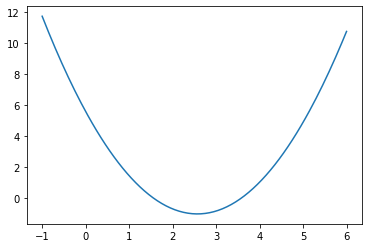

In [3]:
plt.plot(plot_x, plot_y)

步骤：
1. 计算损失函数对应的导数：$dJ = 2 * (theta - 2.57) - 0$

In [4]:
def dJ(theta):
    return 2 * (theta - 2.57)

2. $\theta$对应值：

In [5]:
def J(theta):
    try:
        return (theta - 2.57) ** 2 - 1
    except:
        return float("inf")

根据坐标点，我们对$\theta$的取值设为-1
3. 循环求解theta对应的J

In [6]:
theta = -1
eta = 0.1
epsilon = 1e-8  # float用于与0做 == 比较是非常危险的，所以定义一个接近0的数字进行差值
theta_history = [theta]
while True:
    gradient = dJ(theta)
    last_theta = theta
    # theta -= (eta * gradient)  这种方式不能应用在矩阵中运算
    theta = theta - eta * gradient
    theta_history.append(theta)
    if abs(J(theta) - J(last_theta)) < epsilon:
        break
print(theta)
print(J(theta))

2.569875603655689
-0.9999999845255495


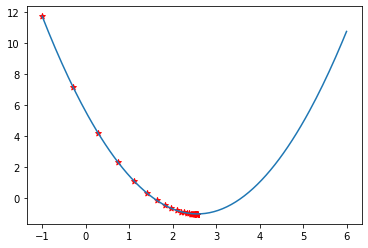

47


In [7]:
# 画图：
plt.plot(plot_x, J(plot_x))
plt.scatter(np.array(theta_history), J(np.array(theta_history)), color="red", marker="*")
plt.show()
print(len(theta_history))

$\eta$作为学习率（learning rate），暨超参，对整体有什么影响？

为了方便，我先把梯度下降设置为一个函数：



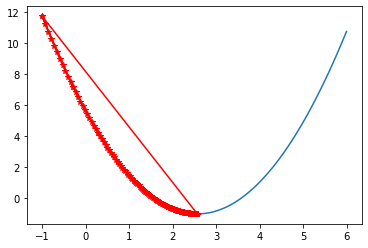

In [8]:
def gradient_descent(ini_theta, eta, n_iter=1e4, draw=True, epsilon=1e-8):
    theta = ini_theta
    theta_history.append(theta)
    i_iter = 0
    while i_iter < n_iter:
        gradient = dJ(theta)
        last_theta = theta
        theta -= (eta * gradient)
        theta_history.append(theta)
        if abs(J(last_theta) - Stheta) < epsilon:
            break
        i_iter += 1
    if draw:
        plt.plot(plot_x, J(plot_x))
        plt.plot(np.array(theta_history), J(np.array(theta_history)), color="red", marker="*")
        plt.show()


gradient_descent(ini_theta=min(plot_x), eta=.01, draw=True)


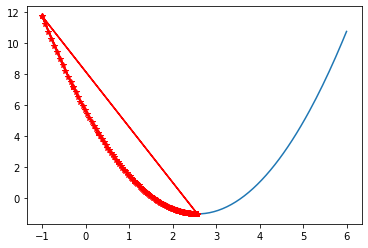

In [9]:
gradient_descent(ini_theta=min(plot_x), eta=.1, draw=True)

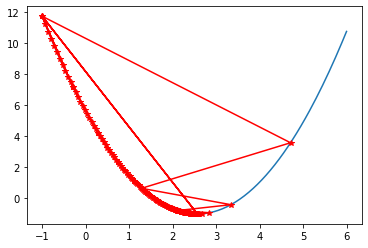

In [10]:
gradient_descent(ini_theta=min(plot_x), eta=0.8, draw=True)

In [11]:
# gradient_descent(ini_theta=min(plot_x),eta=1.1,draw=True)

所以，$\eta$取值是直接影响到机器学习的，$\eta$太大会使程序崩溃，所以要在J的时候try/except，同时需要对gradient_descent()进行控制

